In [135]:
import pandas as pd 

data = pd.read_csv('../Dataset/meaningful_comparison.csv')
data

,meaningful_comparison,year,title,num_ref,num_ref_3years,arxiv,neurips,iclr,icml,aaai,...,atr37,atr38,atr39,citation_count,citedIn2018,citedIn2019,citedIn2020,citedIn2021,citedIn2022,citedIn2023
0,0,2019,Discriminator Rejection Sampling,29,21,10,1,2,0,0,...,0,20,122,100,7.0,26.0,29.0,24.0,16.0,3.0
1,1,2019,KnockoffGAN: Generating Knockoffs for Feature ...,36,8,7,0,2,1,0,...,2,52,226,41,2.0,11.0,8.0,11.0,12.0,1.0
2,0,2017,Towards the Limit of Network Quantization,41,18,14,0,8,1,0,...,2,33,154,147,26.0,30.0,30.0,32.0,26.0,6.0
3,0,2019,Unsupervised Speech Recognition via Segmental ...,42,10,6,2,1,1,0,...,8,42,161,31,0.0,6.0,6.0,6.0,14.0,0.0
4,0,2017,Lie-Access Neural Turing Machines,19,11,1,0,0,0,0,...,1,59,136,19,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0,2019,Guiding Policies with Language via Meta-Learning,45,20,1,0,1,3,4,...,3,83,214,44,1.0,10.0,10.0,9.0,15.0,4.0
1352,0,2018,Graph Attention Networks,42,19,9,5,5,4,0,...,2,35,104,7414,0.0,0.0,0.0,0.0,0.0,1000.0
1353,0,2020,Training individually fair ML models with sens...,46,12,4,0,2,0,1,...,4,63,220,75,0.0,1.0,14.0,20.0,42.0,9.0
1354,0,2019,Selfless Sequential Learning,48,12,12,0,6,1,0,...,1,34,167,86,3.0,17.0,23.0,24.0,22.0,6.0


In [136]:
label_counts = data.groupby(['title', 'meaningful_comparison']).size().unstack(fill_value=0)
dominant_labels = label_counts.idxmax(axis=1)
data = data.merge(dominant_labels.rename('dominant_label'), left_on='title', right_index=True)
df_filtered = data[data['meaningful_comparison'] == data['dominant_label']]

label_counts_0 = data[data['meaningful_comparison'] == 0].groupby('title').size().rename('count_0')
label_counts_1 = data[data['meaningful_comparison'] == 1].groupby('title').size().rename('count_1')

df_filtered = df_filtered.merge(label_counts_0, left_on='title', right_index=True, how='left')
df_filtered = df_filtered.merge(label_counts_1, left_on='title', right_index=True, how='left')

df_filtered = df_filtered[df_filtered['count_0'] != df_filtered['count_1']]
df_filtered = df_filtered.drop(['dominant_label', 'count_0', 'count_1'], axis=1)

In [137]:
data = df_filtered.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 1355
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meaningful_comparison  913 non-null    int64  
 1   year                   913 non-null    int64  
 2   title                  913 non-null    object 
 3   num_ref                913 non-null    int64  
 4   num_ref_3years         913 non-null    int64  
 5   arxiv                  913 non-null    int64  
 6   neurips                913 non-null    int64  
 7   iclr                   913 non-null    int64  
 8   icml                   913 non-null    int64  
 9   aaai                   913 non-null    int64  
 10  iccv                   913 non-null    int64  
 11  cvpr                   913 non-null    int64  
 12  emnlp                  913 non-null    int64  
 13  acl                    913 non-null    int64  
 14  naacl                  913 non-null    int64  
 15  eccv 

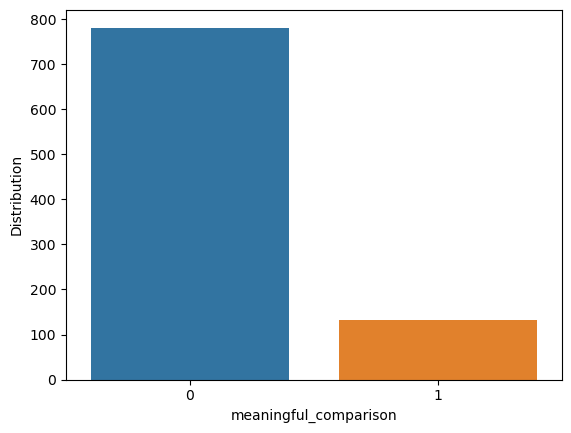

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['meaningful_comparison'])
plt.ylabel('Distribution')
plt.show()

In [139]:
import plotly.graph_objects as go
import numpy as np

def correlation_matrix(dataframe):
    df_corr = dataframe.corr()
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            x = df_corr.columns,
            y = df_corr.index,
            z = np.array(df_corr),
            text=df_corr.values,
            texttemplate='%{text:.2f}'
        )
    )
    fig.show()

## Citing Sentence Predictor

In [140]:
citing_sentence = data[['atr0', 'atr1', 'atr2', 'atr3', 'atr4', 'atr5', 'atr6', 'atr7', 'atr8', 'atr9', 'atr10', 'atr11', 'atr12', 'atr13', 'atr14', 'atr15', 'atr16', 'atr17', 'atr18', 'atr19']]
y = data['meaningful_comparison']

In [141]:
dataframe = citing_sentence.join([y])
correlation_matrix(dataframe)

In [142]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

def find_chi(features, y, k):
    chi_square = SelectKBest(score_func=chi2, k=k)
    fit = chi_square.fit(features, y)
    
    selected_feature_indices = chi_square.get_support(indices=True)
    feature_names = features.columns
    chi2_scores = fit.scores_
    feature_score_dict = dict(zip(feature_names, chi2_scores))
    sorted_features = sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True)
    selected_feature_names = [feature[0] for feature in sorted_features[:k]]
    
    print("Selected Feature Names:", selected_feature_names)
    x_chi = chi_square.fit_transform(features, y)
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x_chi)
    
    x_res, y_res = oversampling(x, y)
    x_train, x_test, y_train, y_test = train_split(x_res, y_res)
    return x_train, x_test, y_train, y_test, selected_feature_names

In [143]:
from imblearn.over_sampling import SMOTE

def oversampling(x, y):
    sm = SMOTE(random_state=123)
    x_res, y_res = sm.fit_resample(x, y)
    return x_res, y_res

In [144]:
from sklearn.model_selection import train_test_split

def train_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    return x_train, x_test, y_train, y_test

In [145]:
test = pd.DataFrame(columns=['Features', 'Accuracy'])

In [146]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def model(features, y, i):
    model = XGBClassifier(learning_rate=0.3, n_estimators=50, max_depth=8)
    x_train, x_test, y_train, y_test, selected_feature_names = find_chi(features, y, i)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    new_data = pd.DataFrame({'Features': [selected_feature_names], 'Accuracy': ["%.2f%%" % (accuracy * 100.0)]})
    global test
    test = pd.concat([test, new_data], ignore_index=True)
    return accuracy

Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31', 'atr38', 'atr30', 'atr35', 'atr36']
Accuracy: 93.61%


In [147]:
for i in dict(enumerate(citing_sentence)):
    accuracy = model(citing_sentence, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr14']
Accuracy: 52.08%
Selected Feature Names: ['atr14', 'atr7']
Accuracy: 72.52%
Selected Feature Names: ['atr14', 'atr7', 'atr9']
Accuracy: 82.43%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16']
Accuracy: 88.82%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6']
Accuracy: 88.50%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6', 'atr13']
Accuracy: 87.86%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6', 'atr13', 'atr17']
Accuracy: 89.78%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6', 'atr13', 'atr17', 'atr18']
Accuracy: 91.69%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6', 'atr13', 'atr17', 'atr18', 'atr5']
Accuracy: 90.73%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6', 'atr13', 'atr17', 'atr18', 'atr5', 'atr3']
Accuracy: 89.78%
Selected Feature Names: ['atr14', 'atr7', 'atr9', 'atr16', 'atr6', 'atr13', 'atr17', 'atr18', 'atr5', 'atr3', '

## Regular Sentences Predictor

In [148]:
regular_sentences = data[['atr20', 'atr21', 'atr22', 'atr23', 'atr24', 'atr25', 'atr26', 'atr27', 'atr28', 'atr29', 'atr30', 'atr31', 'atr32', 'atr33', 'atr34', 'atr35', 'atr36', 'atr37', 'atr38', 'atr39']]

In [149]:
dataframe = regular_sentences.join([y])
correlation_matrix(dataframe)

In [150]:
for i in dict(enumerate(regular_sentences)):
    accuracy = model(regular_sentences, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr25']
Accuracy: 70.61%
Selected Feature Names: ['atr25', 'atr39']
Accuracy: 77.96%
Selected Feature Names: ['atr25', 'atr39', 'atr20']
Accuracy: 80.51%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26']
Accuracy: 85.94%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33']
Accuracy: 87.22%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31']
Accuracy: 89.78%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31', 'atr38']
Accuracy: 90.10%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31', 'atr38', 'atr30']
Accuracy: 90.73%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31', 'atr38', 'atr30', 'atr35']
Accuracy: 91.69%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31', 'atr38', 'atr30', 'atr35', 'atr36']
Accuracy: 93.61%
Selected Feature Names: ['atr25', 'atr39', 'atr20', 'atr26', 'atr33', 'atr31', 'atr38

## Reference-Based Predictor

In [151]:
reference_based = data[['num_ref', 'num_ref_3years', 'arxiv', 'neurips', 'iclr', 'icml', 'aaai', 'iccv', 'cvpr', 'emnlp', 'acl', 'naacl', 'eccv', 'icra', 'icassp', 'ijcai', 'aistats', 'sigkdd', 'neuralcom', 'ieee_tran', 'acm_tran', 'mit_press', 'nature', 'jmlr']]

In [152]:
dataframe = reference_based.join([y])
correlation_matrix(dataframe)

In [153]:
for i in dict(enumerate(reference_based)):
    accuracy = model(reference_based, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['num_ref']
Accuracy: 70.29%
Selected Feature Names: ['num_ref', 'num_ref_3years']
Accuracy: 83.71%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran']
Accuracy: 82.43%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr']
Accuracy: 81.79%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'icml']
Accuracy: 85.62%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'icml', 'arxiv']
Accuracy: 86.58%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'icml', 'arxiv', 'sigkdd']
Accuracy: 86.90%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'icml', 'arxiv', 'sigkdd', 'neurips']
Accuracy: 90.73%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'icml', 'arxiv', 'sigkdd', 'neurips', 'icassp']
Accuracy: 89.78%
Selected Feature Names: ['num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'icml', 'arxiv', 'sigkdd', 'neurips

## Combination Predictor

In [154]:
combination = citing_sentence.join([regular_sentences, reference_based])

In [155]:
for i in dict(enumerate(combination)):
    accuracy = model(combination, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr25']
Accuracy: 70.61%
Selected Feature Names: ['atr25', 'atr39']
Accuracy: 77.96%
Selected Feature Names: ['atr25', 'atr39', 'num_ref']
Accuracy: 77.96%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years']
Accuracy: 86.90%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years', 'acm_tran']
Accuracy: 88.18%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years', 'acm_tran', 'cvpr']
Accuracy: 85.62%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'atr14']
Accuracy: 86.90%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'atr14', 'icml']
Accuracy: 87.86%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'atr14', 'icml', 'arxiv']
Accuracy: 85.62%
Selected Feature Names: ['atr25', 'atr39', 'num_ref', 'num_ref_3years', 'acm_tran', 'cvpr', 'atr14', 'icml', 'arxiv', 'atr7']
Accuracy: 89.4

In [156]:
test.to_excel('meaningful.xlsx', index=False)